In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [218]:
def final_value(x, p):
    return p * np.maximum(0, x) + (1-p) * np.maximum(0, -x)

In [219]:
def generate_data(init_states, dt):
    '''
    Given matrix of initial states, X, a n-by-3 generate data at each time-step in forward time
    
    Input: X (shape: (n, 2)) --> x, v
    
    Output: X(N, 3), V(N, 1)
    '''
    ts = np.arange(dt, 1.01, dt)
    x0 = init_states
    N = x0.shape[0]
    ps = np.random.uniform(size=(N,1), low=0, high=1)
#     X = np.hstack((np.zeros((N, 1)), x0))
    X = np.concatenate((np.zeros((N, 1)), x0, ps), 1)

    u = [-1, 1]
    d = [-0.8, 0.8]
    da = np.array([a - b for a, b in product(u, d)])
    da = da * 0.5 * dt**2
    
    X_train = [X]
    for i in range(len(ts)):
        x_new = np.array([X_train[i][:, 1] + X_train[i][:, 2] + a for a in da]).reshape(-1, 1)
        v_new = np.array([X_train[i][:, 2] + a for a in da]).reshape(-1, 1)
        p_new = np.multiply(X_train[i][:, 3].reshape(-1, 1), 
                            np.ones((X_train[i].shape[0], 4))).reshape(-1, 1)
        X_new = np.concatenate((ts[i] * np.ones_like(x_new), x_new, v_new, p_new), 1)
        X_train.append(X_new)

#     X_train = np.vstack(X_train)
    
#     X_train = np.hstack((X_train, ps))
        
#     Values = [final_value]
#     for i in reversed(range(len(ts))):

    return X_train

In [220]:
x1 = np.random.uniform(size=(100, 1), low=-1, high=1)
v1 = np.zeros_like(x1)
X = np.hstack((x1, v1))
dt = 0.1
X_train = generate_data(X, dt)

In [221]:
X_train[-1]

array([[ 1.        ,  0.41952639, -0.01      ,  0.90659122],
       [ 1.        , -0.70732926, -0.01      ,  0.90659122],
       [ 1.        ,  0.72215396, -0.01      ,  0.90659122],
       ...,
       [ 1.        ,  0.10563654,  0.01      ,  0.35199092],
       [ 1.        ,  0.77872487,  0.01      ,  0.35199092],
       [ 1.        ,  0.66627055,  0.01      ,  0.35199092]])

In [222]:
def generate_value(states):
    '''
    Input: states: (N, 3) from t = 0 to t = T
    
    Output: V - shape: (N, 1)
    '''
    # first get value of the final time
    X_final = states[-1]
    value = final_value(X_final[:, 1], X_final[:, -1])
    
    return value

In [224]:
v = generate_value(X_train)

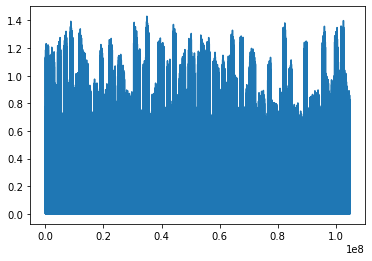